<a href="https://colab.research.google.com/github/hansglick/RnnNumPy/blob/master/Serge_NAKACHE_R%C3%A9seau_de_neurones_pour_reconnaissance_d'images_CIFAR10_Serge_NAKACHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation de TensorFlow 2.0 et Chargement des librairies

In [0]:
# Installation de la version 2.0 de TensorFlow (la librairie de deep learning de Google)
!pip install -q tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# Vérification qu'on a bien la version 2.0
print("")
print("La version de TensorFlow utilisée est " + tf.__version__)


La version de TensorFlow utilisée est 2.0.0-beta1


# Téléchargement et Exploration du dataset CIFAR10
On utilise le jeu de données du [CIFAR10 Project](https://www.cs.toronto.edu/~kriz/cifar.html) de Toronto University


In [0]:
# TéléChargement du dataset CIFAR10, dataset contenant 60,000 images réparties en 10 classes (6,000 images par classe)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# Comme tu peux le voir une image est un tenseur, une matrice 32x32 pixels avec une profondeur de taille 3, pour les 3 couleurs Rouge, Vert, Bleu
# La dimension de l'image n°0
print (train_images[0].shape) 

(32, 32, 3)


In [0]:
# Le tenseur représenant l'image n°0, les valeurs représentent de la couleur [0..255] pour les trois couches R,V,B
# Les 15 premiers pixels de l'image n°0
train_images[0][1][:15]


array([[ 16,  20,  20],
       [  0,   0,   0],
       [ 18,   8,   0],
       [ 51,  27,   8],
       [ 88,  51,  21],
       [120,  82,  43],
       [128,  89,  45],
       [127,  86,  44],
       [126,  87,  50],
       [116,  79,  44],
       [106,  70,  37],
       [101,  67,  35],
       [105,  70,  36],
       [113,  74,  35],
       [109,  70,  33]], dtype=uint8)

Le label de l'image n°21 est :
cat


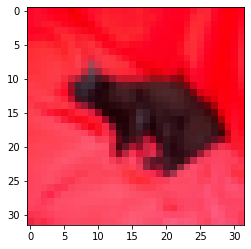

In [0]:
# Affichage de l'image 21
image_id = 21 # Tu parcourir le dataset en changeant l'index du dataset
image_label = class_names[train_labels[image_id][0]]
image_tensor =  train_images[image_id]
plt.imshow(image_tensor, cmap=plt.cm.binary)
print ("Le label de l'image n°{} est :\n{}".format(image_id,str(image_label)))

# Un minimum de features engineering s'impose ...

In [0]:
# Afin d'accélerer la convergence du gradient descent il est recommandé de normaliser les valeurs des pixels entre 0 et 1
train_images_normalized, test_images_normalized = train_images / 255.0, test_images / 255.0

# Définition de l'Architecture du réseau de neurones

In [0]:
# Il s'agit d'un réseau de neurones à 5 couches de type CNN (c'est un peu particulier, je rentre pas dans le détails)
# Tu peux voir les fonctions d'activations relu
# Tu peux voir que la dernière couche contient 10 neurones avec une fonction d'activation Softmax pour la prédiction finale
# C'est un modèle assez primaire pour de la reconnaissance d'images, peu de couches, et pas de régularisation
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
# Plusieurs specifies
 * 

In [0]:
# Attribution des poids
 1. 


1.0

In [0]:
# Tu peux voir le nombre de paramètres entraînés sur chaque couche
# Le réseau de neurones contient comme tu peux le voir 122,570 paramètres (Rappel : 50,000 images dans le training set!!!)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

# Compilation du modèle

In [0]:
# On définit quelques caractéristiques du réseau de neurones
# ADAM est une méthode pas con de descente du gradient
# Sparse Categomrcial Crossentropy est la fonction de coût utilisé (afin de mettre à jour les paramètres)
# Accuracy est une métrique qu'on souhaite tracker à chaque epoch
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du réseau de neurones
Les choses sérieuses commencent, **il faut s'assurer qu'on a bien TPU (ou GPU)** de cochée quand on fait *Runtime/Change Runtime* Type dans Hardware Accelerator afin d'avoir accès à un serveur puissant

In [0]:
# On entraîne le réseau pendant 10 "époques", i.e. on va parcourir 10 fois le dataset.
# Les paramètres sont mis à jour plusieurs fois par époque et non une seule fois comme dans la descente du gradient classique (technique du minBatch Algorithm)
TrainingHistory = model.fit(train_images_normalized, train_labels, epochs=10, validation_data=(test_images_normalized, test_labels))
# A chaque batch, tu peux observer l'accuracy augmenter (en moyenne) sur le validation set (le test set quoi)
# Batch : un échantillon du dataset, en général 64 ou 128 observations
# Durée de l'entraînement : ~ 800 secondes (~12 min)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.5106 - accuracy: 0.4517 - val_loss: 1.2050 - val_accuracy: 0.5699
Epoch 2/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.1304 - accuracy: 0.6009 - val_loss: 1.0609 - val_accuracy: 0.6220
Epoch 3/10
50000/50000 [==============================] - 75s 1ms/sample - loss: 0.9742 - accuracy: 0.6575 - val_loss: 0.9781 - val_accuracy: 0.6547
Epoch 4/10
50000/50000 [==============================] - 75s 2ms/sample - loss: 0.8804 - accuracy: 0.6926 - val_loss: 0.9196 - val_accuracy: 0.6792
Epoch 5/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 0.8135 - accuracy: 0.7147 - val_loss: 0.8814 - val_accuracy: 0.6924
Epoch 6/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.7568 - accuracy: 0.7345 - va

In [0]:
model.history.history['val_loss']

[1.2050437866210937,
 1.060867684173584,
 0.9781365217208863,
 0.91955510263443,
 0.8814200457572937,
 0.8730580043792725,
 0.9169474625587464,
 0.8518831953048706,
 0.8578634965896607,
 0.8623380537986756]

# Review de l'entraînement

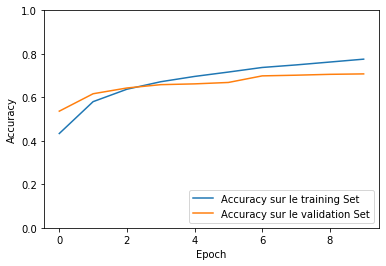

In [0]:
# On peut voir qu'on n'a pas encore atteint un plateau tout à fait sur le validation set, on pourrait améliorer le modèle en augmentant le nombre d'époques
plt.plot(TrainingHistory.history['accuracy'], label='Accuracy sur le training Set')
plt.plot(TrainingHistory.history['val_accuracy'], label = 'Accuracy sur le validation Set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

# Visualisation des Prédictions


Le label de l'image n°6914 est :
ship

Le NN a prédit : ship


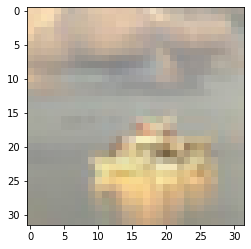

In [0]:
# Tire une image au hasard dans le test set, et regarde ce que le modèle a prédit
RandomTestImageID = np.random.choice(len(test_labels), 1)[0]
imageValue = test_images[RandomTestImageID]
imageLabel = class_names[test_labels[RandomTestImageID][0]]

plt.imshow(imageValue, cmap=plt.cm.binary)
print ("Le label de l'image n°{} est :\n{}".format(RandomTestImageID,str(imageLabel)))

imageValue = np.expand_dims(imageValue, axis=0)
predictions = model.predict(imageValue)
classID = np.where(predictions==1)[1][0]
print('\nLe NN a prédit :', class_names[classID])

# Visualiser les poids du réseau
On peut regarder quels sont les poids de la dernière couche du réseau de neurones


In [0]:
# Les poids de la dernière couche
# Matrice de 64 x 10
model.layers[7].get_weights()[0]

array([[-8.62263292e-02,  8.03648029e-03,  1.91214859e-01,
        -1.32916808e-01, -1.63738370e-01, -3.39667909e-02,
        -4.57935721e-01,  3.36481243e-01, -4.27164614e-01,
         1.70000598e-01],
       [ 1.38565004e-01, -1.94145232e-01, -2.73295015e-01,
        -9.15130228e-02, -2.64365882e-01, -2.76973307e-01,
         1.33785993e-01, -1.21798366e-01, -1.01901434e-01,
        -4.64027887e-03],
       [ 1.48634156e-02, -4.90431577e-01,  2.64272422e-01,
        -1.08135745e-01, -3.18649262e-01, -2.93341696e-01,
         2.49983743e-01, -3.08061063e-01, -2.24199221e-01,
         3.74416679e-01],
       [-4.06340957e-02,  2.57601917e-01, -1.96545288e-01,
         2.33340397e-01, -1.64091438e-01, -1.43492138e-02,
         1.10456660e-01, -2.29403317e-01, -2.60930032e-01,
        -2.29786381e-01],
       [-2.19846159e-01, -4.08509187e-03,  3.56608704e-02,
        -1.06020838e-01, -3.56730312e-01,  1.42293215e-01,
         6.76589310e-02, -2.86828995e-01, -2.79961675e-01,
        -2.

In [1]:
!git init

Initialized empty Git repository in /content/.git/


In [0]:
!git config --global user.email "hansglick@gmail.com"

In [0]:
!git config --global user.username "HansGlick"

!git remote add origin https://github.com/hansglick/colabtest.git


In [0]:
!git add .

In [7]:
!git push -u origin master

error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/hansglick/colabtest.git'
